In [41]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [42]:
## url das bases de dados
url_adult_train = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_adult_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [43]:
## lendo os dados em python
adult_train = pd.read_csv(url_adult_train, sep=',',header=None)
adult_test = pd.read_csv(url_adult_test, sep=',',skiprows=1,header=None)

In [44]:
## dados estão sem cabeçalho, temos que colocar as colunas nos dataframes
columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss',
           'hours_per_week','country','income_higher_than_50k']

adult_train.columns = columns
adult_test.columns = columns

In [45]:
# retirando os valores ?
adult_train = adult_train.replace(' ?', np.NaN, inplace=False)
adult_test = adult_test.replace(' ?', np.NaN, inplace=False)

In [46]:
## Conforme documentação do próprio site, a coluna fnlwgt não tem função descrição nenhuma.
## coluna education assim como a coluna education-num representam a mesma informação, vamos trabalhar com a coluna education-num e retirar a education
adult_train = adult_train.drop(['fnlwgt', 'education'], axis = 1)
adult_test = adult_test.drop(['fnlwgt', 'education'], axis = 1)

In [47]:
### Preprocessamento dos dados 
rlog_adult_train = adult_train.copy()
rlog_adult_test = adult_test.copy()

In [48]:
## determinando o valor de y que o se a pessoal tem um income > que 50k
## retirando o valor de y da base de treino
colunas_categoricas = rlog_adult_train.select_dtypes('object').columns.tolist()

In [49]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in colunas_categoricas:
   rlog_adult_train[column] = label.fit_transform(rlog_adult_train[column])

In [50]:
## retirando o valor de y da base de treino
y = rlog_adult_train['income_higher_than_50k']
rlog_adult_train.drop(['income_higher_than_50k'], axis = 1, inplace = True)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split


## agora iremos alocar 30% do dados de treino para o houldout e 70% do dados de treino para base de treino
X_train, X_holdout, y_train, y_holdout = train_test_split(
    rlog_adult_train, y, test_size=0.3, random_state=17
)

estimador = LogisticRegression(max_iter = 150)

#treinando o modelo utilizando os dados de treino
rlog = estimador.fit(X_train,y_train)

c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
y_pred = rlog.predict(X_holdout)

In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Modelo de Regressão Logística para dados de Holdout')
print('Acuracia Holdout:', accuracy_score(y_pred, y_holdout))
print('Precisão Holdout:', precision_score(y_pred, y_holdout))
print('Revocacao Holdout:', recall_score(y_pred, y_holdout))
print('f1_score Holdout:', f1_score(y_pred, y_holdout))

Modelo de Regressão Logística para dados de Holdout
Acuracia Holdout: 0.8103183539768656
Precisão Holdout: 0.38277310924369745
Revocacao Holdout: 0.7034749034749035
f1_score Holdout: 0.4957823129251701


In [54]:
## tuning parameters
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]


grid_search = GridSearchCV(estimator = estimador,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [55]:
rlog_cv = grid_search.fit(X_train, y_train)

c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

In [56]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8064


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, max_iter=150)


In [57]:
y_pred_cv = grid_search.predict(X_holdout)

In [58]:
print('Modelo de Regressão Logística para dados de Holdout')
print('Acuracia Holdout:', accuracy_score(y_pred_cv, y_holdout))
print('Precisão Holdout:', precision_score(y_pred_cv, y_holdout))
print('Revocacao Holdout:', recall_score(y_pred_cv, y_holdout))
print('f1_score Holdout:', f1_score(y_pred_cv, y_holdout))

Modelo de Regressão Logística para dados de Holdout
Acuracia Holdout: 0.8107278124680111
Precisão Holdout: 0.3873949579831933
Revocacao Holdout: 0.7022086824067022
f1_score Holdout: 0.49932304359599244


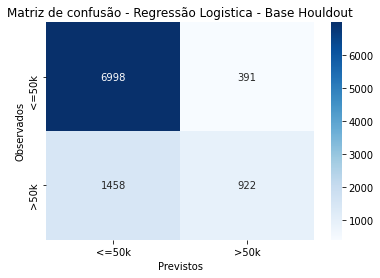

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix_rlog = confusion_matrix(y_holdout, y_pred_cv)
ax = sn.heatmap(cf_matrix_rlog, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - Regressão Logistica - Base Houldout')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [60]:
### Para a base de testes
## encoding
for column in colunas_categoricas:
   rlog_adult_test[column] = label.fit_transform(rlog_adult_test[column])

In [61]:
## retirando o valor de y da base de treino
y_teste = rlog_adult_test['income_higher_than_50k']
rlog_adult_test.drop(['income_higher_than_50k'], axis = 1, inplace = True)

In [62]:
# base teste
X_teste = rlog_adult_test.copy()

In [63]:
y_hat = rlog_cv.predict(X_teste)

In [64]:
print('Modelo de Regressão Logística para dados de teste')
print('Acuracia teste:', accuracy_score(y_hat, y_teste))
print('Precisão teste:', precision_score(y_hat, y_teste))
print('Revocacao teste:', recall_score(y_hat, y_teste))
print('f1_score teste:', f1_score(y_hat, y_teste))

Modelo de Regressão Logística para dados de teste
Acuracia teste: 0.8093483201277563
Precisão teste: 0.38507540301612064
Revocacao teste: 0.6671171171171171
f1_score teste: 0.4882954170787999


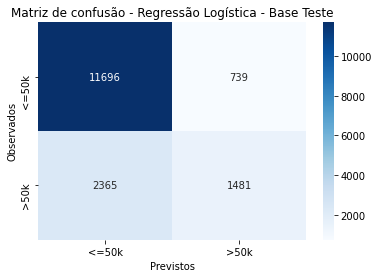

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix_rlog_cv = confusion_matrix(y_teste, y_hat)
ax = sn.heatmap(cf_matrix_rlog_cv, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - Regressão Logística - Base Teste')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()